In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from itertools import product
from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy import stats

In [136]:
print("Hello World")
print("Hello World")

Hello World
Hello World


In [137]:
df = pd.read_csv('Autism-Child-Data.arff.csv')
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [138]:
df.shape

(292, 21)

In [139]:
len(df[df['gender']=='m'])

208

In [140]:
len(df[df['gender']=='f'])

84

In [141]:
positive = df[df['Class/ASD']=='YES']
len(positive)

141

In [142]:
negative = df[df['Class/ASD']=='NO']
len(negative)

151

In [143]:
len(positive[positive['gender']=='m'])

103

In [144]:
len(positive[positive['gender']=='f'])

38

In [145]:
df['Class/ASD'].unique()
df.loc[df['Class/ASD'] == 'NO', 'Class/ASD'] = 0
df.loc[df['Class/ASD'] == 'YES', 'Class/ASD'] = 1
df.loc[df['gender'] == 'f', 'gender'] = 0
df.loc[df['gender'] == 'm', 'gender'] = 1

In [146]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [147]:
yes = df[df['A1_Score']==1]
no = df[df['A1_Score']==0]
yesPercentage = len(yes)*100/len(df)
yesPercentage = "{:.2f}".format(yesPercentage)
noPercentage = len(no)*100/len(df)
noPercentage = "{:.2f}".format(noPercentage)
cor, pvalue = stats.ttest_ind(df['A1_Score'], df['Class/ASD'])
print('All Yes = '+str(len(yes))+'('+str((yesPercentage))+'%)')
print('All No = '+ str(len(no))+' ('+str(noPercentage)+'%)')
YesPositive = yes[yes['Class/ASD']==0]
YesPositivePercent = len(YesPositive)*100/len(yes)
YesPositivePercent = "{:.2f}".format(YesPositivePercent)
YesNegaive = yes[yes['Class/ASD']==1]
YesNegativepercent = len(YesNegaive)*100/len(yes)
YesNegativepercent = "{:.2f}".format(YesNegativepercent)
print('Positive among Yes = '+ str(len(YesPositive))+'('+str((YesPositivePercent))+'%)')
print('Negative among yes = '+ str(len(YesNegaive))+'('+str((YesNegativepercent))+'%)')
NoPositive = no[no['Class/ASD']==0]
NoPositivePercent = len(NoPositive)*100/len(no)
NoPositivePercent = "{:.2f}".format(NoPositivePercent)
NoNegative = no[no['Class/ASD']==1]
NoNegativePercent = len(NoNegative)*100/len(no)
NoNegativePercent = "{:.2f}".format(NoNegativePercent)
print('Positive among No = '+ str(len(NoPositive))+'('+str((NoPositivePercent))+'%)')
print('Negative among No = '+ str(len(NoNegative))+'('+str((NoNegativePercent))+'%)')
print('P value  = '+ str(pvalue))

All Yes = 185(63.36%)
All No = 107 (36.64%)
Positive among Yes = 68(36.76%)
Negative among yes = 117(63.24%)
Positive among No = 83(77.57%)
Negative among No = 24(22.43%)
P value  = 0.0002333505208560525


In [148]:
df["age"].replace({"?": np.nan}, inplace=True)
df["contry_of_res"].replace({"?": np.nan}, inplace=True)
df["age_desc"].replace({"?": np.nan}, inplace=True)
df["relation"].replace({"?": np.nan}, inplace=True)

In [149]:
df = df.dropna()

In [150]:
df['A1_Score'] = df['A1_Score'].astype('bool')
df['A2_Score'] = df['A2_Score'].astype('bool')
df['A3_Score'] = df['A3_Score'].astype('bool')
df['A4_Score'] = df['A4_Score'].astype('bool')
df['A5_Score'] = df['A5_Score'].astype('bool')
df['A6_Score'] = df['A6_Score'].astype('bool')
df['A7_Score'] = df['A7_Score'].astype('bool')
df['A8_Score'] = df['A8_Score'].astype('bool')
df['A9_Score'] = df['A9_Score'].astype('bool')
df['A10_Score'] = df['A10_Score'].astype('bool')
df['gender'] = df['gender'].astype('category')
df['jundice'] = df['jundice'].astype('bool')
df['austim'] = df['austim'].astype('bool')
df['used_app_before'] = df['used_app_before'].astype('bool')
df['Class/ASD'] = df['Class/ASD'].astype('bool')
df['relation'] = df['relation'].astype('category')
df['age'] = df['age'].astype('float')

In [151]:
df['Class/ASD'].unique()

array([False,  True])

In [152]:
len(df[df['gender']==0])

74

In [153]:
ASD1 = df[df['Class/ASD']==1]
ASD0 = df[df['Class/ASD']==0]

In [154]:
len(ASD0[ASD0['gender']=='f'])

0

In [155]:
x = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Gender', 'Jaundice', 'Autism', 'UAB']
Yes = []
No  = []

In [156]:
target = df['Class/ASD']
df = df.drop(['age_desc', 'contry_of_res', 'relation'], axis=1)

In [157]:
df = df.drop(['ethnicity', 'result'], axis=1)

In [158]:
df.loc[df['Class/ASD'] == 'NO', 'Class/ASD'] = 0
df.loc[df['Class/ASD'] == 'YES', 'Class/ASD'] = 1
df['Class/ASD'] = df['Class/ASD'].astype(bool)

In [159]:
X = df.drop(['Class/ASD'], axis=1)
y = df['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [160]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.9333333333333333
f1: 0.9333333333333333
precision_score: 0.9333333333333333
recall_score: 0.9333333333333333
log_loss: 2.3026383994893926
mcc: 0.874916238285134
kapp: 0.8671625929861849


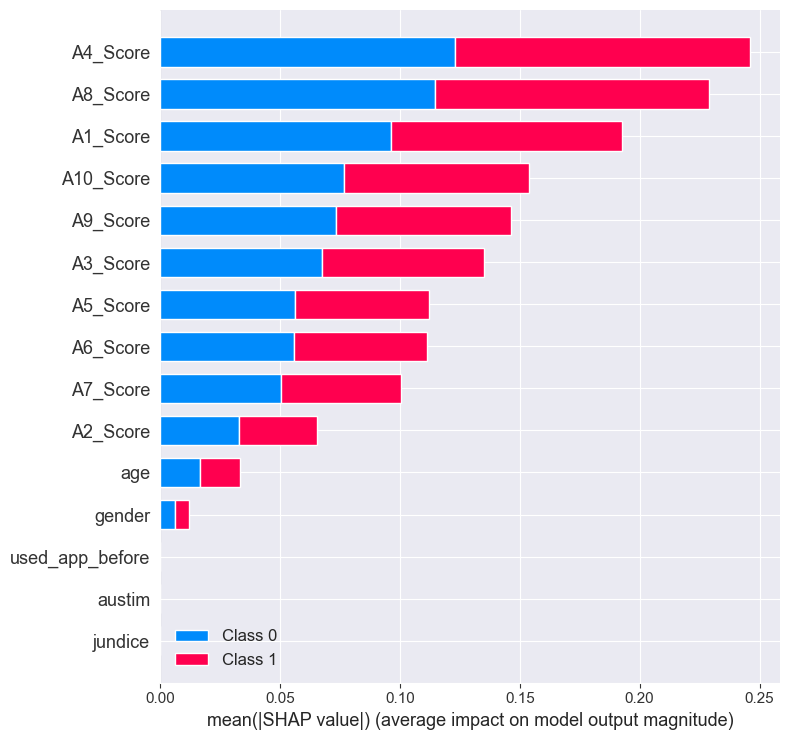

In [161]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
sns.set_style('darkgrid')
shap.summary_plot(shap_values, X)

In [162]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
acc = dt.score(X_test, y_test)
y_pred = dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.92
f1: 0.92
precision_score: 0.92
recall_score: 0.92
log_loss: 2.763134095490063
mcc: 0.8397435897435898
kapp: 0.8397435897435898


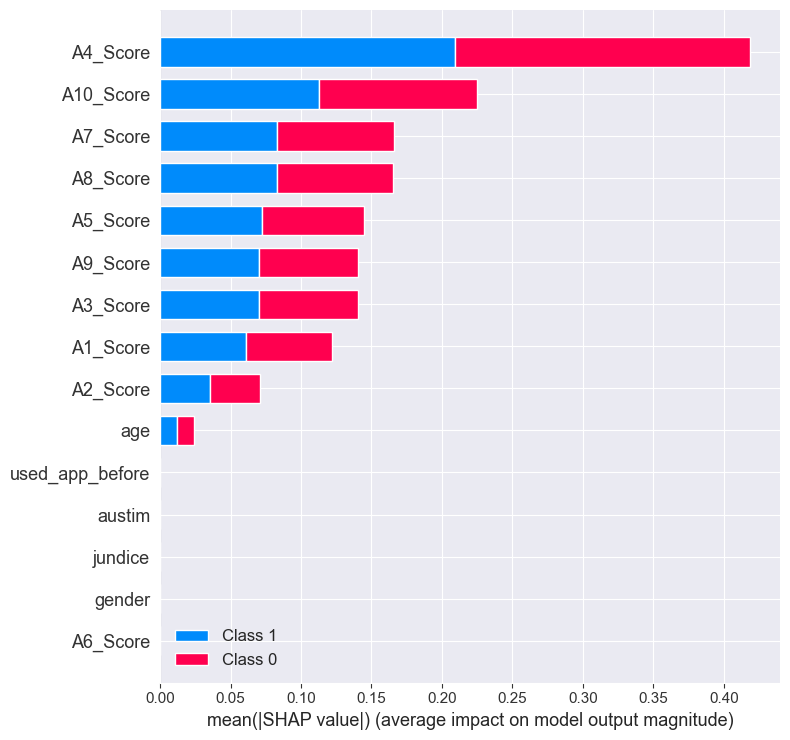

In [163]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X)
sns.set_style('darkgrid')
shap.summary_plot(shap_values, X)

In [164]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.8933333333333333
f1: 0.8933333333333333
precision_score: 0.8933333333333333
recall_score: 0.8933333333333333
log_loss: 3.68418945528582
mcc: 0.783297793203171
kapp: 0.7821350762527233


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [165]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
mlp = MLPClassifier(hidden_layer_sizes=20)
mlp.fit(X_train, y_train)
acc = mlp.score(X_test, y_test)
y_pred = mlp.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.9066666666666666
f1: 0.9066666666666666
precision_score: 0.9066666666666666
recall_score: 0.9066666666666666
log_loss: 3.2236724366870106
mcc: 0.8114737571170484
kapp: 0.8087431693989071


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

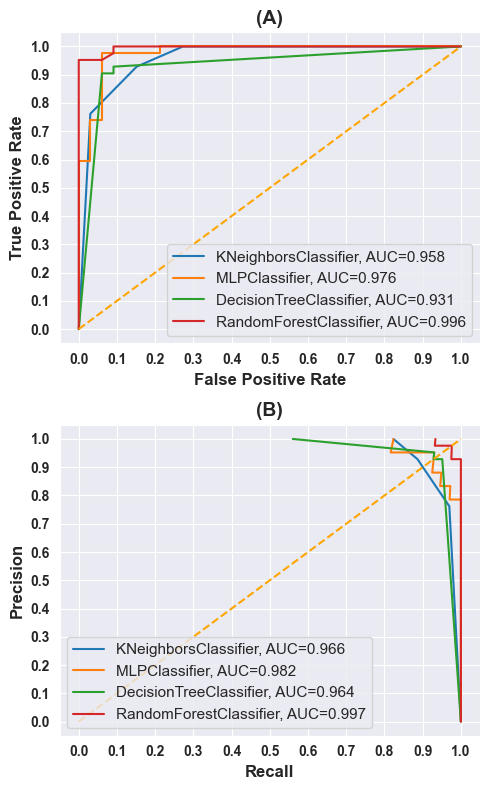

In [166]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, auc, roc_curve, roc_auc_score, precision_recall_curve
classifiers = [ KNeighborsClassifier(n_neighbors=4),
               MLPClassifier(hidden_layer_sizes=20),
               DecisionTreeClassifier(max_depth=6),
               RandomForestClassifier(n_estimators=60)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'lr_precision', 'lr_recall', 'lr_auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    yproba = model.predict_proba(X_test)[:, 1]
    yhat = model.predict(X_test)

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, yproba)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'lr_precision': lr_precision,
                                        'lr_recall': lr_recall,
                                        'lr_auc': lr_auc}, ignore_index=True)
# Set name of the classifiers as index labels

result_table.set_index('classifiers', inplace=True)
# ........................................................................................


# ROC Curve Analysis


classifiers1 = [KNeighborsClassifier(n_neighbors=4),
               MLPClassifier(hidden_layer_sizes=20),
               DecisionTreeClassifier(max_depth=6),
               RandomForestClassifier(n_estimators=60)]
# Define a result table as a DataFrame
result_table1 = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers1:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table1 = result_table1.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)


# ........................................................................................
fig = plt.figure(figsize=(5, 8))
sns.set_style('darkgrid')
ax1 = fig.add_subplot(2, 1, 2)
for i in result_table.index:
    plt.plot(result_table.loc[i]['lr_precision'],
             result_table.loc[i]['lr_recall'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['lr_auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1), weight='bold')
plt.xlabel("Recall", weight='bold', fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1), weight='bold')
plt.ylabel("Precision", weight='bold', fontsize=12)

plt.title('(B)', fontweight='bold', fontsize=14)
plt.legend(prop={'size': 11}, loc='lower left')

# ..................................................................................................
# ROC Curve Analysis
ax1 = fig.add_subplot(2, 1, 1)
for i in result_table1.index:
    plt.plot(result_table1.loc[i]['fpr'],
             result_table1.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table1.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1), weight='bold')
plt.xlabel("False Positive Rate", weight='bold', fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1), weight='bold')
plt.ylabel("True Positive Rate", weight='bold', fontsize=12)

plt.title('(A)', fontweight='bold', fontsize=14)
plt.legend(prop={'size': 11}, loc='lower right')
# ..................................................................................................



plt.tight_layout()
plt.savefig('AUC.png', dpi=800)
plt.savefig('AUC.pdf', dpi=800)
plt.show()


An input array is constant; the correlation coefficient is not defined.


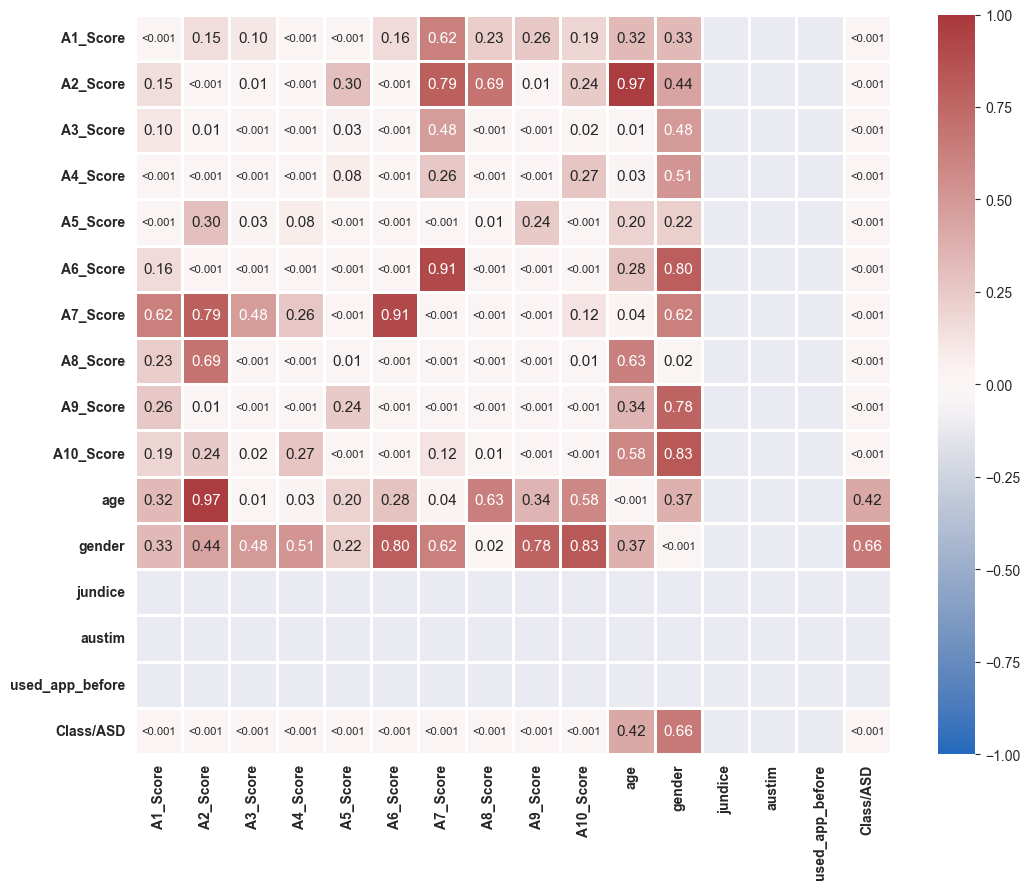

In [167]:
df1 = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim', 'used_app_before',
       'Class/ASD']]
df2 = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim','used_app_before',
       'Class/ASD']]
def compute_corr_and_p(df1, df2):
  corrs = pd.DataFrame(index=df1.columns, columns=df2.columns, dtype=np.float64)
  pvals = corrs.copy()

  for i, j in product(df1.columns, df2.columns):
    corrs.loc[i,j], pvals.loc[i,j] = pearsonr(df1[i], df2[j])

  return corrs, pvals

def plot(corrs, pvals, siglevel=.01):
  mask = np.zeros_like(corrs, dtype=np.bool)
  mask[np.triu_indices_from(mask) | (pvals >= siglevel) ] = True

  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  sns.heatmap(pvals,  cmap=cmap, center=0, square=True, linewidths=.5,
           cbar_kws={'shrink': .5}, annot=True)
cor, p = compute_corr_and_p(df1,df2)
plt.figure( figsize=(11,9))
g = sns.heatmap(p,vmin=-1, vmax=1, cmap='vlag',annot=True, annot_kws={"size":7}, fmt='.2f', linewidths=1, linecolor='w')
# plot(cor, p, 0.01)
mask = np.invert(np.tril(p<0.05))
# fig = plt.figure(figsize=(4,4))
# sns.heatmap(p, cmap="vlag", vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='w')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
for text in g.texts:
    text.set_size(11)
    if text.get_text() < '0.001':
        text.set_text('<0.001')
        text.set_size(8)
        # text.set_weight('bold')

# Save a high-res copy of the image to disk
plt.tight_layout()

In [168]:
top10 = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','Class/ASD']]

In [169]:
top10.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,True,True,False,False,True,True,False,True,False,False,False
1,True,True,False,False,True,True,False,True,False,False,False
4,True,True,True,True,True,True,True,True,True,True,True
6,True,False,True,True,True,True,False,True,False,True,True
7,True,True,True,True,True,True,True,True,False,False,True


In [170]:
X = top10.drop(['Class/ASD'], axis=1)
y = top10['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [171]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.9333333333333333
f1: 0.9333333333333333
precision_score: 0.9333333333333333
recall_score: 0.9333333333333333
log_loss: 2.3025957542931157
mcc: 0.8681880666670039
kapp: 0.8653500897666069


In [172]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
acc = dt.score(X_test, y_test)
y_pred = dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.9333333333333333
f1: 0.9333333333333333
precision_score: 0.9333333333333333
recall_score: 0.9333333333333333
log_loss: 2.3026064155921846
mcc: 0.86459654297262
kapp: 0.8642779587404995


In [173]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.9333333333333333
f1: 0.9333333333333333
precision_score: 0.9333333333333333
recall_score: 0.9333333333333333
log_loss: 2.3026277381903233
mcc: 0.8696581196581197
kapp: 0.8668796592119276


In [174]:
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, matthews_corrcoef, cohen_kappa_score
mlp = MLPClassifier(hidden_layer_sizes=20)
mlp.fit(X_train, y_train)
acc = mlp.score(X_test, y_test)
y_pred = mlp.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
log_loss = log_loss(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kapp = cohen_kappa_score(y_test, y_pred)
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))
print('log_loss: '+ str(log_loss))
print('mcc: '+ str(mcc))
print('kapp: '+ str(kapp))

Accuracy: 0.8533333333333334
f1: 0.8533333333333335
precision_score: 0.8533333333333334
recall_score: 0.8533333333333334
log_loss: 5.065804478876664
mcc: 0.7415646748190232
kapp: 0.7096092925026399


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
